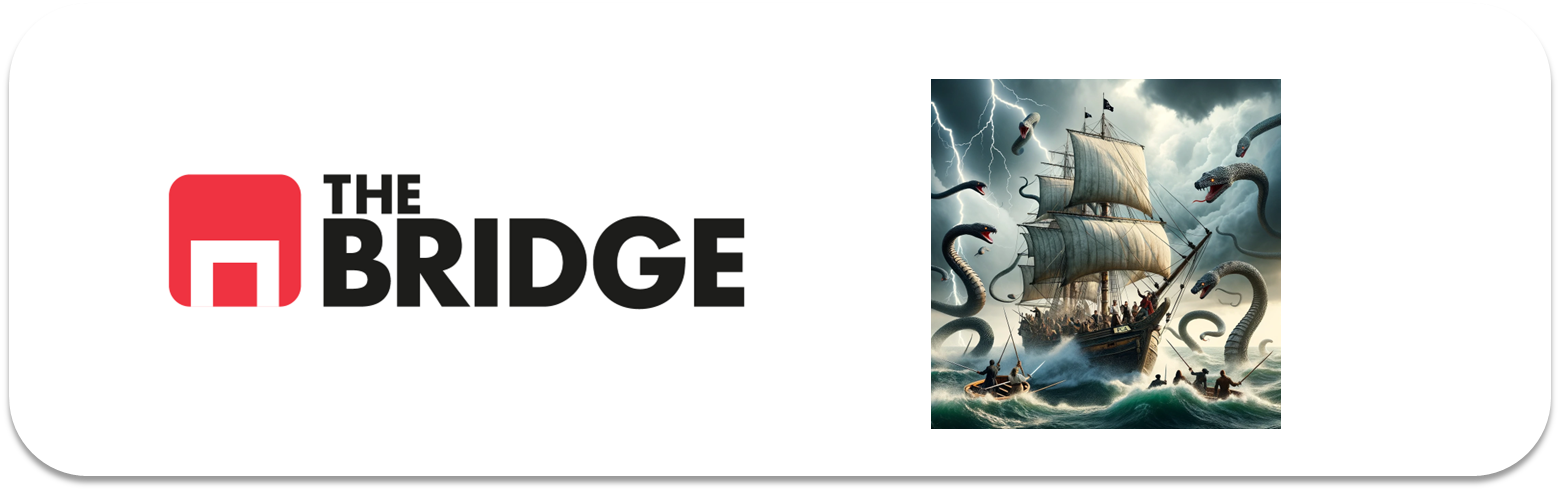

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [98]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import cross_val_score, GridSearchCV


#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [99]:
df = pd.read_csv('./data/credit_npo.csv')
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,12537.0,0.068916,0.253321,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,12537.0,0.330359,0.368148,0.0,0.030651,0.163490,0.582219,6.0
age,12537.0,52.079445,15.077498,21.0,41.000000,51.000000,62.000000,101.0
NumberOfTime30-59DaysPastDueNotWorse,12537.0,0.409588,4.055787,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,12537.0,1.902253,9.122216,0.0,0.142268,0.302025,0.506725,99.0
MonthlyIncome,11816.0,6864.815420,11855.905437,0.0,3498.750000,5416.000000,8300.000000,702500.0
NumberOfOpenCreditLinesAndLoans,12537.0,8.482332,5.165422,0.0,5.000000,8.000000,11.000000,49.0
NumberOfTimes90DaysLate,12537.0,0.259312,4.035658,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,12537.0,0.999202,1.134325,0.0,0.000000,1.000000,2.000000,19.0
NumberOfTime60-89DaysPastDueNotWorse,12537.0,0.228364,4.018873,0.0,0.000000,0.000000,0.000000,98.0


1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.


In [102]:
# Eliminar filas con valores nulos
df = df.dropna()

# Convertir features seleccionadas a categóricas
df['NumberOfTime30-59DaysPastDueNotWorse'] = df['NumberOfTime30-59DaysPastDueNotWorse'].astype('category')
df['NumberOfTimes90DaysLate'] = df['NumberOfTimes90DaysLate'].astype('category')
df['NumberOfTime60-89DaysPastDueNotWorse'] = df['NumberOfTime60-89DaysPastDueNotWorse'].astype('category')


2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.

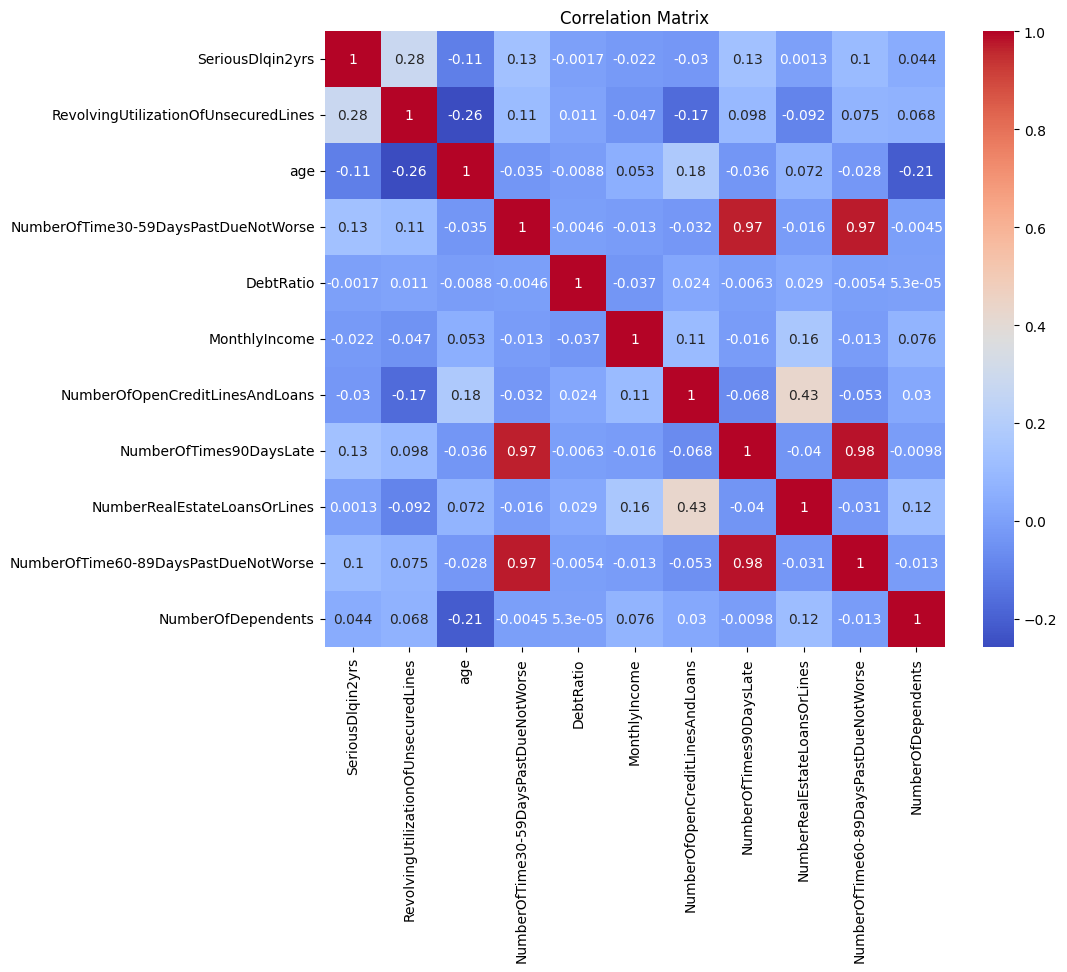

In [103]:
# Calcular matriz de correlación
corr_matrix = df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [104]:
# Calcular matriz de covarianza
cov_matrix = np.cov(df.values.T)

# Definir umbral de covarianza
threshold = 0.5

# Filtrar características basadas en el umbral de covarianza
selected_features = []

for i in range(cov_matrix.shape[0]):
    for j in range(i+1, cov_matrix.shape[1]):
        if abs(cov_matrix[i, j]) >= threshold:
            if df.columns[i] not in selected_features:
                selected_features.append(df.columns[i])
            if df.columns[j] not in selected_features:
                selected_features.append(df.columns[j])

# Mostrar características seleccionadas
print("Selected features based on covariance threshold:")
print(selected_features)


Selected features based on covariance threshold:
['SeriousDlqin2yrs', 'MonthlyIncome', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents', 'DebtRatio']


2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 


In [105]:
X = df[selected_features]
y = df['SeriousDlqin2yrs']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
baseline = np.mean(cross_val_score(rfc,X_train,y_train, scoring = "balanced_accuracy", cv = 5))
print(f"Baseline: {baseline}%")

Baseline: 1.0%


In [107]:
#Train test split
X_train_visual = X_train[selected_features]

#Random Forest Classifier
rfc_1 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)

visual_score = np.mean(cross_val_score(rfc_1, X_train_visual, y_train, cv = 5, scoring= "balanced_accuracy"))
num_feats_visual = len(selected_features)
num_feats_baseline = len(X_train.columns)
print(f"Visual: {visual_score*100.0}%/{len(selected_features)} feats. vs Baseline: {baseline*100.0}%/{num_feats_baseline} feats.")

Visual: 100.0%/11 feats. vs Baseline: 100.0%/11 feats.


In [108]:
# Encontrar las 5 mejores características
num_feats_anova = 5
select_feature = SelectKBest(f_classif, k=num_feats_anova).fit(X_train, y_train)

best_features_sorted = pd.DataFrame({'Feature': X_train.columns, 'Score': select_feature.scores_}).sort_values(by='Score', ascending=False)
features_anova = select_feature.get_feature_names_out()
best_features_sorted.head()

,Feature,Score
0,SeriousDlqin2yrs,inf
2,RevolvingUtilizationOfUnsecuredLines,829.602605
4,NumberOfTime30-59DaysPastDueNotWorse,152.484361
6,NumberOfTimes90DaysLate,150.171311
3,age,111.110548


In [109]:
print(features_anova)

['SeriousDlqin2yrs' 'RevolvingUtilizationOfUnsecuredLines' 'age'
 'NumberOfTime30-59DaysPastDueNotWorse' 'NumberOfTimes90DaysLate']


In [110]:
# Transformar el dataset a solo las 5 mejores características
X_train_anova = select_feature.transform(X_train)


#Random Forest Classifier
rfc_2 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)

anova_score = np.mean(cross_val_score(rfc_1, X_train_anova, y_train, cv = 5, scoring= "balanced_accuracy"))

print(f"ANOVA: {anova_score*100.0}%/{num_feats_anova} feats. vs Baseline: {baseline*100.0}%/{num_feats_baseline} feats.")

ANOVA: 100.0%/5 feats. vs Baseline: 100.0%/11 feats.


3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)

In [111]:
from sklearn.feature_selection import SelectFromModel


selector_model = SelectFromModel(estimator = rfc, threshold= "median") 
selector_model.fit(X_train,y_train)
print("Escogidas:", selector_model.get_feature_names_out())


Escogidas: ['SeriousDlqin2yrs' 'RevolvingUtilizationOfUnsecuredLines'
 'NumberOfTime30-59DaysPastDueNotWorse' 'NumberOfOpenCreditLinesAndLoans'
 'NumberOfTimes90DaysLate' 'NumberOfTime60-89DaysPastDueNotWorse']


In [112]:
from sklearn.linear_model import LogisticRegression

lc_clf = LogisticRegression(max_iter = 1000)
X_train_model_median = selector_model.transform(X_train)
score_model_median = np.mean(cross_val_score(lc_clf, X_train_model_median, y_train, cv = 5, scoring = "balanced_accuracy"))
num_features_model_median = X_train_model_median.shape[1]
print(f"LR: {score_model_median*100.0}%/{num_features_model_median} feats. vs Baseline: {baseline*100.0}%/{num_feats_baseline} feats.")


LR: 100.0%/6 feats. vs Baseline: 100.0%/11 feats.


segun RF

In [113]:
selector_model = SelectFromModel(estimator = rfc, threshold= "median", max_features= 5) 
selector_model.fit(X_train,y_train)
print("Escogidas:", selector_model.get_feature_names_out())

lc_clf = LogisticRegression(max_iter = 1000)
X_train_model_median = selector_model.transform(X_train)
score_model_median = np.mean(cross_val_score(lc_clf, X_train_model_median, y_train, cv = 5, scoring = "balanced_accuracy"))
num_features_model_median = X_train_model_median.shape[1]
print(f"LR: {score_model_median*100.0}%/{num_features_model_median} feats. vs Baseline: {baseline*100.0}%/{num_feats_baseline} feats.")

Escogidas: ['SeriousDlqin2yrs' 'RevolvingUtilizationOfUnsecuredLines'
 'NumberOfTime30-59DaysPastDueNotWorse' 'NumberOfTimes90DaysLate'
 'NumberOfTime60-89DaysPastDueNotWorse']
LR: 100.0%/5 feats. vs Baseline: 100.0%/11 feats.


4. Selección de las mejores features empleando RFE.

In [114]:
from sklearn.feature_selection import RFE

#Random Forest Classifier
rfc_3 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)

#Recursive Feature Elimination y entrenar el modelo
num_feats_rfe = 5
rfe = RFE(estimator=rfc_3, n_features_to_select= num_feats_rfe, step=1)
rfe = rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)

rfe_score = np.mean(cross_val_score(rfc_3, X_train_rfe, y_train, cv = 5, scoring= "balanced_accuracy"))

print(f"ANOVA: {rfe_score*100.0}%/{num_feats_anova} feats. vs Baseline: {baseline*100.0}%/{num_feats_baseline} feats.")

ANOVA: 100.0%/5 feats. vs Baseline: 100.0%/11 feats.


In [115]:
features_rfe = rfe.get_feature_names_out()
features_rfe

array(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
       'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumberOfTime60-89DaysPastDueNotWorse'], dtype=object)

5. Selección de las mejores features empleando SFS.

In [116]:

# Definir el modelo de clasificación
rfc_3 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

num_feats_sfs = 5

sfs = SFS(estimator=rfc_3, k_features=num_feats_sfs, forward=True, floating=False, scoring='accuracy', cv=5)

sfs = sfs.fit(X_train_std, y_train)

selected_features = list(sfs.k_feature_names_)

sfs_score = np.mean(cross_val_score(sfs, X_train_std, y_train, cv=5, scoring='accuracy'))

print(f"SFS: {sfs_score*100.0}%/{num_feats_sfs} feats.")

selected_indices = list(sfs.k_feature_idx_)




SFS: nan%/5 feats.


In [117]:
features_sfs = [X.columns[i] for i in selected_indices]
features_sfs

['SeriousDlqin2yrs',
 'MonthlyIncome',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse']

6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.


In [118]:
SFM = selector_model.get_feature_names_out()

In [119]:
SFM

array(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
       'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumberOfTime60-89DaysPastDueNotWorse'], dtype=object)

In [123]:
best_features = list(set(features_anova) | set(SFM) | set(features_rfe) | set(features_sfs))
best_features

['NumberOfTime30-59DaysPastDueNotWorse',
 'SeriousDlqin2yrs',
 'MonthlyIncome',
 'RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'age']

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

In [125]:
# Crear feature_lists concatenando las listas de listas
feature_lists = [features_anova, SFM, features_rfe, features_sfs, best_features]

# Crear un diccionario para almacenar los resultados de cada selección de características para cada modelo
feature_selection_results = {}

# Definir los modelos
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Evaluar cada modelo con cada selección de características
for model_name, model in models.items():
    model_feature_results = {}
    for feature_list in feature_lists:
        column_names = feature_list # Assuming feature_list is already a list of column names
        scores = cross_val_score(model, X[column_names], y, cv=5, scoring='accuracy')
        model_feature_results[str(feature_list)] = np.mean(scores)
    feature_selection_results[model_name] = model_feature_results

# Mostrar los resultados de cada selección de características para cada modelo
print("Resultados de la selección de características:")
for model_name, model_feature_results in feature_selection_results.items():
    print(f"Modelo: {model_name}")
    for feature_list, score in model_feature_results.items():
        print(f"{feature_list}: {score}")

# Seleccionar la mejor selección de características y su puntaje para cada modelo
best_feature_selections = {}
for model_name, model_feature_results in feature_selection_results.items():
    best_feature_selection = max(model_feature_results, key=model_feature_results.get)
    best_score = model_feature_results[best_feature_selection]
    best_feature_selections[model_name] = (best_feature_selection, best_score)

# Mostrar la mejor selección de características y su puntaje para cada modelo
print("\nMejor selección de características para cada modelo:")
for model_name, (best_feature_selection, best_score) in best_feature_selections.items():
    print(f"Modelo: {model_name}")
    print(f"Mejor selección de características: {best_feature_selection}")
    print(f"Precisión promedio: {best_score}\n")


Resultados de la selección de características:
Modelo: Decision Tree
['SeriousDlqin2yrs' 'RevolvingUtilizationOfUnsecuredLines' 'age'
 'NumberOfTime30-59DaysPastDueNotWorse' 'NumberOfTimes90DaysLate']: 1.0
['SeriousDlqin2yrs' 'RevolvingUtilizationOfUnsecuredLines'
 'NumberOfTime30-59DaysPastDueNotWorse' 'NumberOfTimes90DaysLate'
 'NumberOfTime60-89DaysPastDueNotWorse']: 1.0
['SeriousDlqin2yrs', 'MonthlyIncome', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse']: 1.0
['NumberOfTime30-59DaysPastDueNotWorse', 'SeriousDlqin2yrs', 'MonthlyIncome', 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'age']: 1.0
Modelo: Random Forest
['SeriousDlqin2yrs' 'RevolvingUtilizationOfUnsecuredLines' 'age'
 'NumberOfTime30-59DaysPastDueNotWorse' 'NumberOfTimes90DaysLate']: 1.0
['SeriousDlqin2yrs' 'RevolvingUtilizationOfUnsecuredLines'
 'NumberOfTime30-59DaysPastDueNotWorse' 'NumberOfTimes90DaysLate'
 'NumberOfTi

In [127]:
best_model = None
best_features = None
best_score = 0

for model_name, model in models.items():
    for feature_list in feature_lists:
        column_names = feature_list # Assuming feature_list is already a list of column names
        scores = cross_val_score(model, X[column_names], y, cv=5, scoring='recall')
        avg_score = np.mean(scores)
        if avg_score > best_score:
            best_model = model_name
            best_features = feature_list
            best_score = avg_score

print(f"Mejor modelo: {best_model}")
print(f"Mejor selección de características: {best_features}")
print(f"Mejor puntaje promedio (recall): {best_score}")


Mejor modelo: Decision Tree
Mejor selección de características: ['SeriousDlqin2yrs' 'RevolvingUtilizationOfUnsecuredLines' 'age'
 'NumberOfTime30-59DaysPastDueNotWorse' 'NumberOfTimes90DaysLate']
Mejor puntaje promedio (recall): 1.0


4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.

In [128]:
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [129]:
grid_search = GridSearchCV(models[best_model], param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train[best_features], y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall')

In [130]:
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)


Mejores hiperparámetros encontrados:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [131]:
best_model = grid_search.best_estimator_
best_model.fit(X_train[best_features], y_train)
y_pred = best_model.predict(X_test[best_features])
recall = recall_score(y_test, y_pred)
print(f"Recall en el conjunto de prueba: {recall}")


Recall en el conjunto de prueba: 1.0


### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[best_features])


pca = PCA()
pca.fit(X_scaled)
cumulative_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_explained_variance_ratio >= 0.95) + 1


print(f"Number of components selected: {num_components}")

pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
recall_pca = recall_score(y_test, y_pred)
print(f"Recall on Test Set with PCA: {recall_pca}")


Number of components selected: 4
Recall on Test Set with PCA: 1.0
